# Name: Fang Hong

# Project 

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

## Estimating the value of homes from fixed characteristics.

---
Company Goals:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space


Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components


In [ ]:
# pick 5 feasures to predict house value: LotArea; Neighborhood; OverallCond(move to second section); HouseStyles; HeatingQC(move to second)
# do types of foundation
# use different method: one train/split test 50/50 70/30; do a cross validation


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #help ignore warning, make it more clean
pd.set_option('display.max_columns', None) # make it display all columns
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# print row count row=0
print "Number of rows: " + str(house.shape[0])
# print column count column=1
print "Number of columns: " + str(house.shape[1])

Number of rows: 1460
Number of columns: 81


### Part 1: Identify three fixed features: LotArea; Neighborhood; HouseStyle;

Check if there is any white space in front of Neighborhood and HouseStyle

In [14]:
house['Neighborhood'][0]

'CollgCr'

In [15]:
house['HouseStyle'][0]

'2Story'

### Exploratory Data Analysis (EDA): Understanding the features

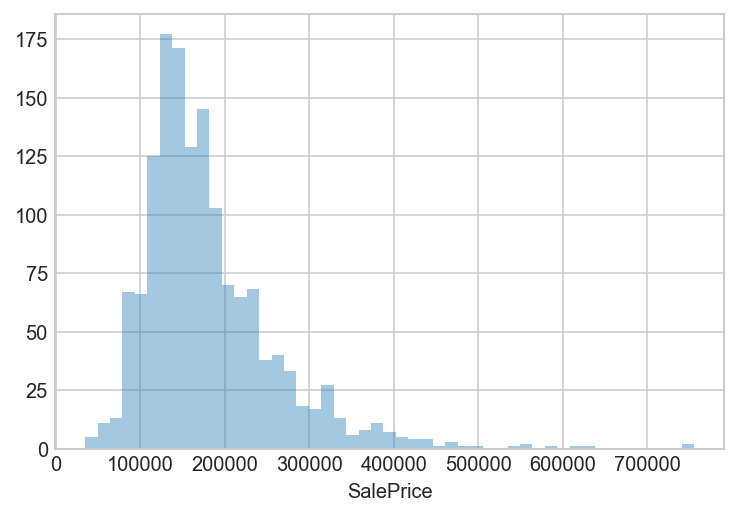

In [16]:
sns.distplot(house['SalePrice'], kde=False) # examine the distribution of target feature

In [17]:
# Select the fixed and outcome variables. 
house1=house[['LotArea', 'Neighborhood', 'HouseStyle', 'SalePrice']]
house1.head()

,LotArea,Neighborhood,HouseStyle,SalePrice
0,8450,CollgCr,2Story,208500
1,9600,Veenker,1Story,181500
2,11250,CollgCr,2Story,223500
3,9550,Crawfor,2Story,140000
4,14260,NoRidge,2Story,250000


In [18]:
# drop na
house1.dropna()

,LotArea,Neighborhood,HouseStyle,SalePrice
0,8450,CollgCr,2Story,208500
1,9600,Veenker,1Story,181500
2,11250,CollgCr,2Story,223500
3,9550,Crawfor,2Story,140000
4,14260,NoRidge,2Story,250000
5,14115,Mitchel,1.5Fin,143000
6,10084,Somerst,1Story,307000
7,10382,NWAmes,2Story,200000
8,6120,OldTown,1.5Fin,129900
9,7420,BrkSide,1.5Unf,118000


In [19]:
# convert the string value in Neighborhood and HouseStyle to categorical variables 
house1['Neighborhood']=house1['Neighborhood'].astype('category')
house1['HouseStyle']=house1['HouseStyle'].astype('category')
house1.dtypes

LotArea            int64
Neighborhood    category
HouseStyle      category
SalePrice          int64
dtype: object

In [20]:
# add these categorical dataset to house1 dataframe
house1['Neighborhood_c']=house1['Neighborhood'].cat.codes
house1['HouseStyle_c']=house1['HouseStyle'].cat.codes
house1.head()

,LotArea,Neighborhood,HouseStyle,SalePrice,Neighborhood_c,HouseStyle_c
0,8450,CollgCr,2Story,208500,5,5
1,9600,Veenker,1Story,181500,24,2
2,11250,CollgCr,2Story,223500,5,5
3,9550,Crawfor,2Story,140000,6,5
4,14260,NoRidge,2Story,250000,15,5


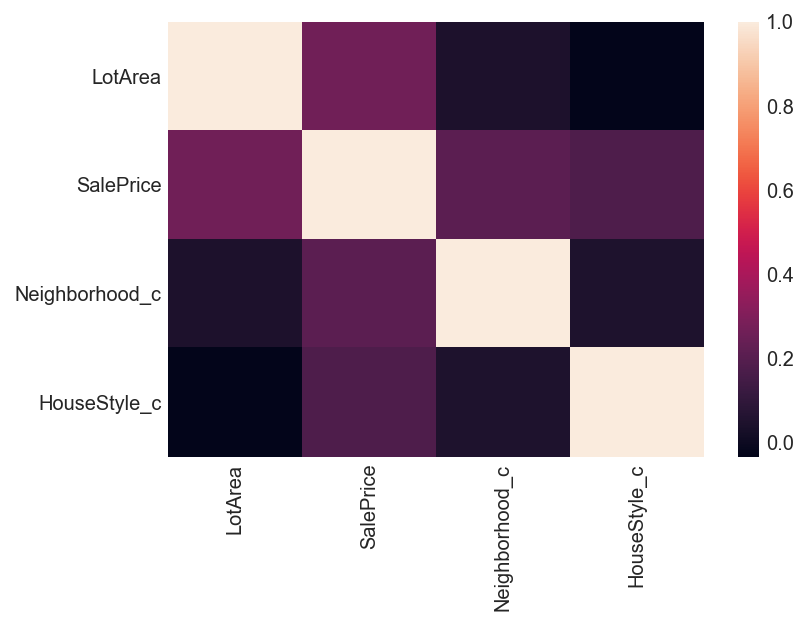

In [21]:
# Examine the correlations of featured variables and outcomes using correlation heatmap
sns.heatmap(house1.corr())

In [26]:
# print correlation table for both target features and predictors
corr=house1[['SalePrice', 'LotArea', 'Neighborhood_c', 'HouseStyle_c']].corr()
corr

,SalePrice,LotArea,Neighborhood_c,HouseStyle_c
SalePrice,1.000000,0.263843,0.210851,0.180163
LotArea,0.263843,1.000000,0.044569,-0.033190
Neighborhood_c,0.210851,0.044569,1.000000,0.048595
HouseStyle_c,0.180163,-0.033190,0.048595,1.000000


The correlation results showed fixed feasure do not have strong correlations with each other, thus, they should be good for model

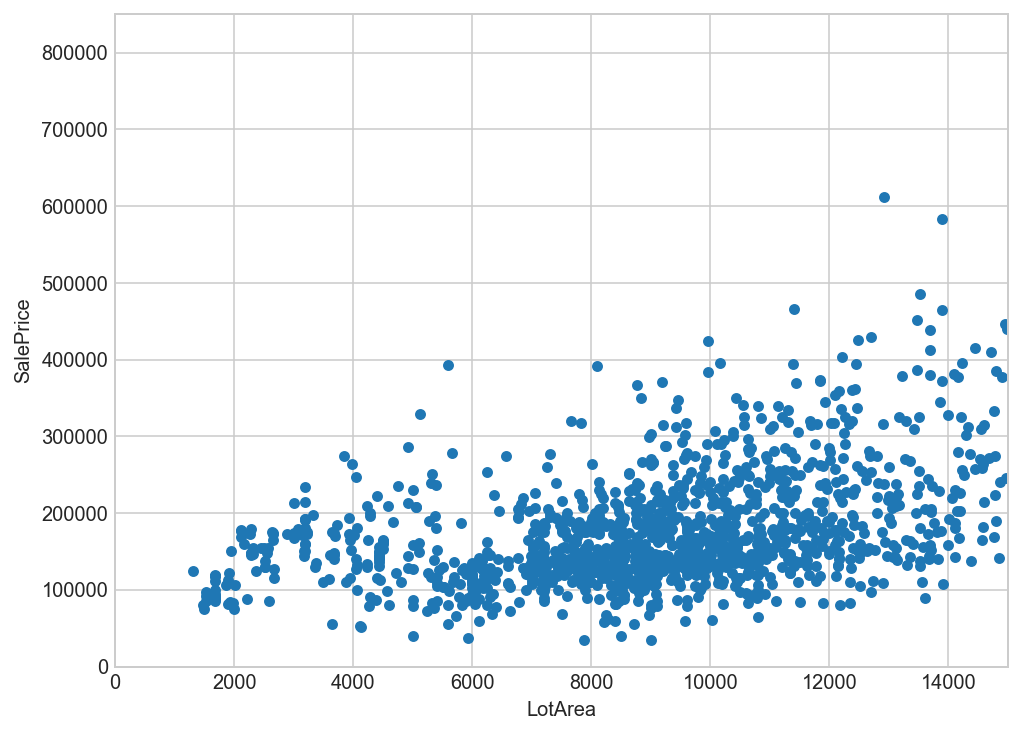

In [28]:
# run linear correlation plot between LotArea and Saleprice
house1.plot.scatter(x='LotArea', y='SalePrice', xlim=(0,15000), ylim=(0,850000), legend=True, figsize=(8, 6))


Seems there are some outliers there

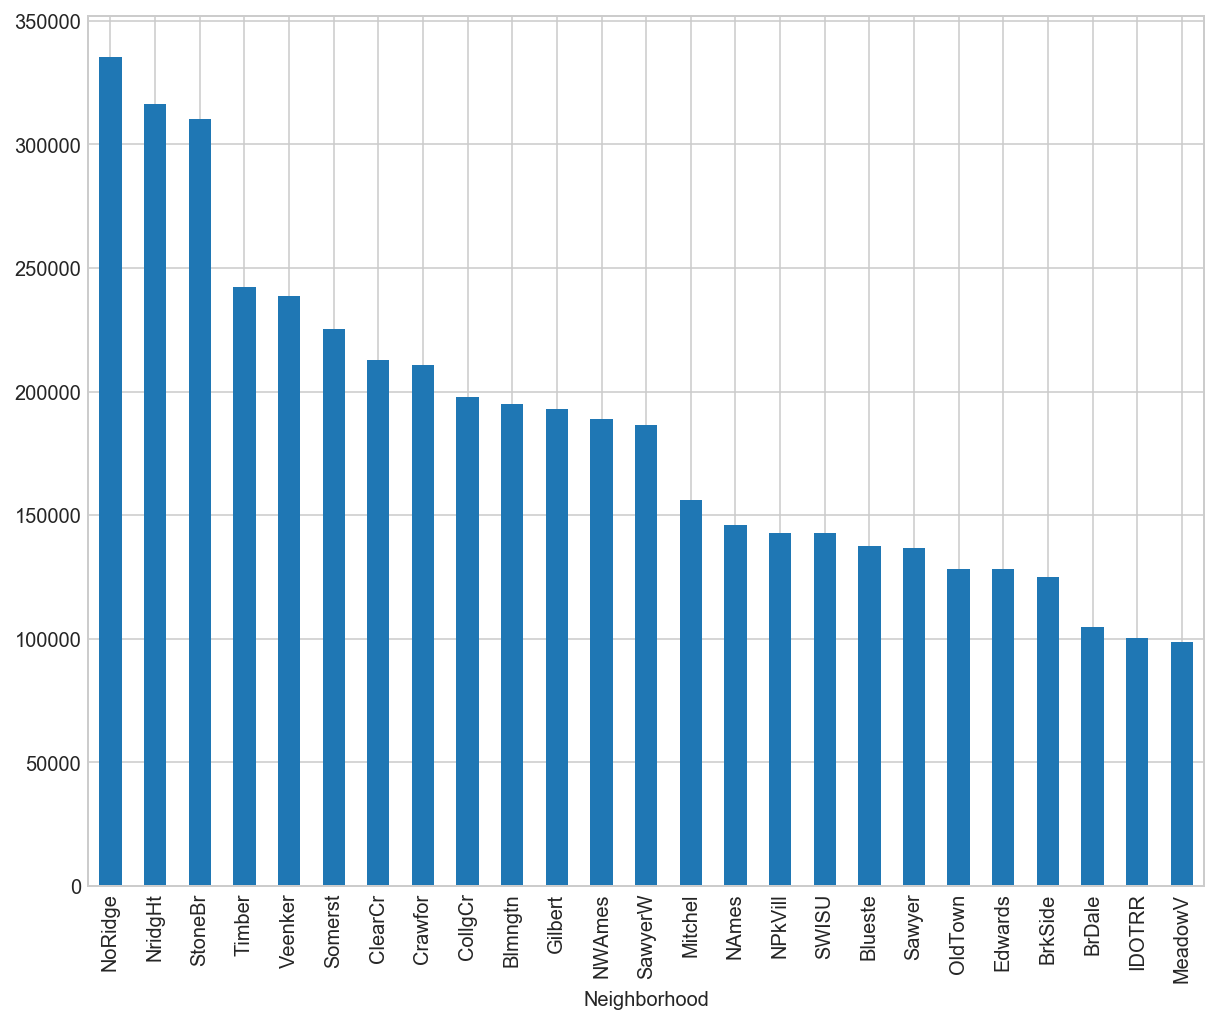

In [29]:
# examine the mean saleprice difference for different neighborhood
house_ne=house1.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=False)
house_ne.plot(kind='bar', figsize=(10, 8))

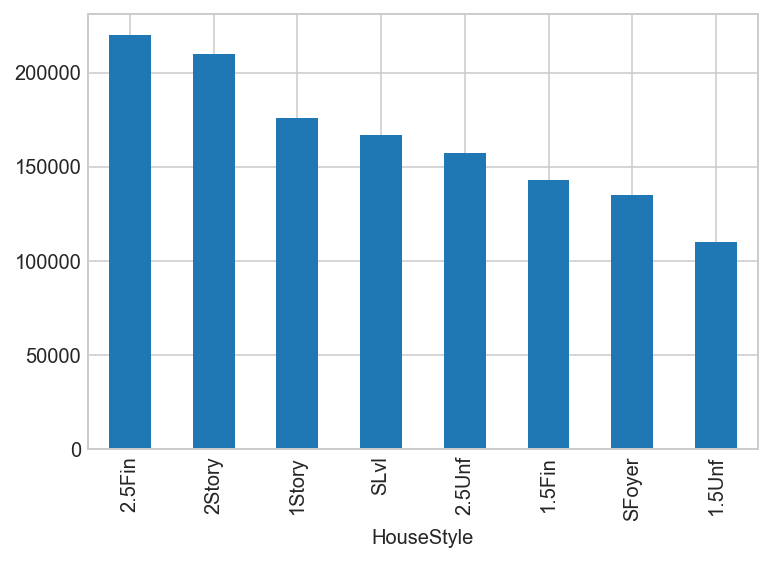

In [30]:
# examine the mean saleprice difference for different neighborhood
house_HS=house1.groupby('HouseStyle').SalePrice.mean().sort_values(ascending=False)
house_HS.plot(kind='bar')

### Part 2: Feature Preprocessing

In [31]:
# convert unordered categorical variables (Neighborhood and Housestyle) to multiple dummy code
house_d=pd.get_dummies(house1.Neighborhood_c, prefix='Neighborhood')
house_d.head()

,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
# drop the first column
house_d.drop(house_d.columns[0], axis=1, inplace=True)
house_d.head()

,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
# concatenate the orginal house1 dataframe and the dummy dataframe
house_d1=pd.concat([house1, house_d], axis=1)
house_d1.head()

,LotArea,Neighborhood,HouseStyle,SalePrice,Neighborhood_c,HouseStyle_c,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24
0,8450,CollgCr,2Story,208500,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9600,Veenker,1Story,181500,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,11250,CollgCr,2Story,223500,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9550,Crawfor,2Story,140000,6,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14260,NoRidge,2Story,250000,15,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
# convert HouseStyle to multiple dummy code
house_d3=pd.get_dummies(house1.HouseStyle_c, prefix='HouseStyle')
house_d3.head()

,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [35]:
# drop the first column of Housestyle
house_d3.drop(house_d3.columns[0], axis=1, inplace=True)
house_d3.head()

,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [36]:
# concatenate the orginal house1 dataframe and the dummy dataframe
house_d4=pd.concat([house_d1, house_d3], axis=1)
house_d4.head()

,LotArea,Neighborhood,HouseStyle,SalePrice,Neighborhood_c,HouseStyle_c,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7
0,8450,CollgCr,2Story,208500,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9600,Veenker,1Story,181500,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,11250,CollgCr,2Story,223500,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9550,Crawfor,2Story,140000,6,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,14260,NoRidge,2Story,250000,15,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
feature_cols=['LotArea', 'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Neighborhood_5', 
              'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8', 'Neighborhood_9','Neighborhood_10', 'Neighborhood_11', 'Neighborhood_12', 'Neighborhood_13', 
              'Neighborhood_14', 'Neighborhood_15', 'Neighborhood_16', 'Neighborhood_17', 'Neighborhood_18', 'Neighborhood_19', 'Neighborhood_20', 'Neighborhood_21','Neighborhood_22', 'Neighborhood_23', 'Neighborhood_24',
              'HouseStyle_1', 'HouseStyle_2', 'HouseStyle_3', 'HouseStyle_4', 'HouseStyle_5', 'HouseStyle_6', 'HouseStyle_7']
x=house_d4[feature_cols]
y=house_d4.SalePrice

print "Feature space holds %d observation and %d feature" % x.shape


Feature space holds 1460 observation and 31 feature


### Part 3: Model Training and Result Evaluation

In [40]:
# Run the linear regression with dummy variables included
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x, y)
list(zip(feature_cols, lr.coef_))

[('LotArea', 1.4280989492646095),
 ('Neighborhood_2', -101005.41006135796),
 ('Neighborhood_3', -72077.658078527631),
 ('Neighborhood_4', -21975.274482535351),
 ('Neighborhood_5', -5327.4698053222819),
 ('Neighborhood_6', 109.32227895650612),
 ('Neighborhood_7', -73444.46393495542),
 ('Neighborhood_8', -22042.946250317778),
 ('Neighborhood_9', -99697.731577674858),
 ('Neighborhood_10', -96792.832163184561),
 ('Neighborhood_11', -44956.040122336097),
 ('Neighborhood_12', -53747.881496841292),
 ('Neighborhood_13', -55619.150105882807),
 ('Neighborhood_14', -18984.38755384431),
 ('Neighborhood_15', 115759.32483704355),
 ('Neighborhood_16', 111623.70467613058),
 ('Neighborhood_17', -78159.428828291857),
 ('Neighborhood_18', -74488.015840323002),
 ('Neighborhood_19', -62557.516684307753),
 ('Neighborhood_20', -18444.912409449942),
 ('Neighborhood_21', 20238.197864198824),
 ('Neighborhood_22', 107364.55352410872),
 ('Neighborhood_23', 20288.574124228973),
 ('Neighborhood_24', 31219.417773324

### Use Train_Test_split to test the predions of these three features on sales price 50/50

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33) #test_size=0.33? test_size=1/3?
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1460, 31)
(978, 31)
(482, 31)


In [42]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1460,)
(978,)
(482,)


In [43]:
import patsy

Step 1: Split X and y into training and testing sets (using random_state for reproducibility).

In [44]:
y, x = patsy.dmatrices("SalePrice ~ LotArea+Neighborhood_2+Neighborhood_3+Neighborhood_4+Neighborhood_5+Neighborhood_6+Neighborhood_7+Neighborhood_8+Neighborhood_9+Neighborhood_10+Neighborhood_11+Neighborhood_12+Neighborhood_13+Neighborhood_14+Neighborhood_15+Neighborhood_16+Neighborhood_17+Neighborhood_18+Neighborhood_19+Neighborhood_20+Neighborhood_21+Neighborhood_22+Neighborhood_23+Neighborhood_24+HouseStyle_1+HouseStyle_2+HouseStyle_3+HouseStyle_4+HouseStyle_5+HouseStyle_6+HouseStyle_7", data=house_d4, return_type="dataframe")
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)

Step 2: Train the model on the training set.¶

In [45]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Step 3: Test the model on the testing set and check the accuracy.¶

In [46]:
from sklearn import metrics
y_pred = lr.predict(x_test)

print(metrics.mean_squared_error(y_train, lr.predict(x_train)))
print(metrics.mean_squared_error(y_test, y_pred))

2697691835.14
2326656168.51


### Using K-Folds Cross-Validation and compare it with Train_Test_Split (k=5)

In [47]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [48]:
mse_values = []
rmse_values=[]
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(x, y):
    lr = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index]))))
    scores.append(lr.score(x, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 2162654002.04
RMSE: 46504.343905
R2: 0.586917700215

Model 2
MSE: 2166615017.85
RMSE: 46546.912012
R2: 0.585355500523

Model 3
MSE: 4945986815.49
RMSE: 70327.7101539
R2: 0.582546745882

Model 4
MSE: 2096247150.6
RMSE: 45784.7916955
R2: 0.583593751289

Model 5
MSE: 2720553767.35
RMSE: 52158.9279735
R2: 0.586452506861

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 2818411350.66
Mean of RMSE for all folds: 52264.537148
Mean of R2 for all folds: 0.584973240954


Model 1 produce the smallest MSE and highest R2. Model 1 is the best model.

### Using K-Folds Cross-Validation and compare it with Train_Test_Split (k=4)

In [50]:
kf = model_selection.KFold(n_splits=4, shuffle=True)
mse_values = []
rmse_values=[]
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(x, y):
    lr = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index]))))
    scores.append(lr.score(x, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 2611239060.66
RMSE: 51100.2843501
R2: 0.586644887609

Model 2
MSE: 2928348031.51
RMSE: 54114.212842
R2: 0.586010326626

Model 3
MSE: 3081982046.43
RMSE: 55515.6018289
R2: 0.585951272405

Model 4
MSE: 2278516654.84
RMSE: 47733.8103951
R2: 0.585813476046

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 2725021448.36
Mean of RMSE for all folds: 52115.977354
Mean of R2 for all folds: 0.586104990671


### Using K-Folds Cross-Validation and compare it with Train_Test_Split (k=3)

In [51]:
kf = model_selection.KFold(n_splits=3, shuffle=True)
mse_values = []
rmse_values=[]
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(x, y):
    lr = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index]))))
    scores.append(lr.score(x, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 2290377662.32
RMSE: 47857.8902828
R2: 0.581923594104

Model 2
MSE: 2900772074.35
RMSE: 53858.8161246
R2: 0.582195024193

Model 3
MSE: 3233875170.04
RMSE: 56867.1712857
R2: 0.58189640298

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 2808341635.57
Mean of RMSE for all folds: 52861.2925644
Mean of R2 for all folds: 0.582005007092


By using 3 or 4 split, MSE becomes smaller than using 5 split.


## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### Step 1: We selected OverallCond and HeatingQC

In [52]:
# Select the fixed and outcome variables. 
boston1=house[['OverallCond', 'HeatingQC', 'SalePrice']]
boston1.head()

,OverallCond,HeatingQC,SalePrice
0,5,Ex,208500
1,8,Ex,181500
2,5,Ex,223500
3,5,Gd,140000
4,5,Ex,250000


Heating QC is categorical(string) and OverallCond is numeric.

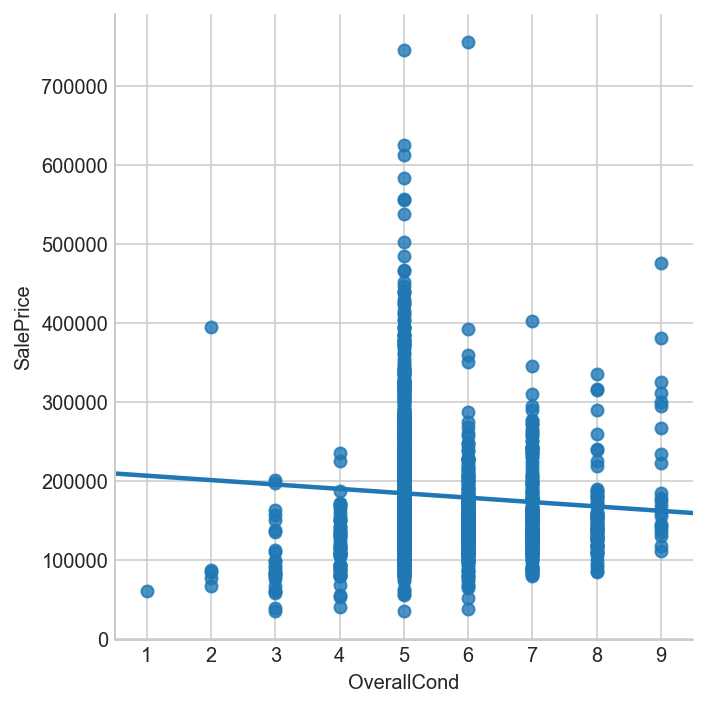

In [75]:
# run linear correlation between OverallCond and Saleprice
sns.lmplot(x='OverallCond', y='SalePrice', data=boston1, ci=None)

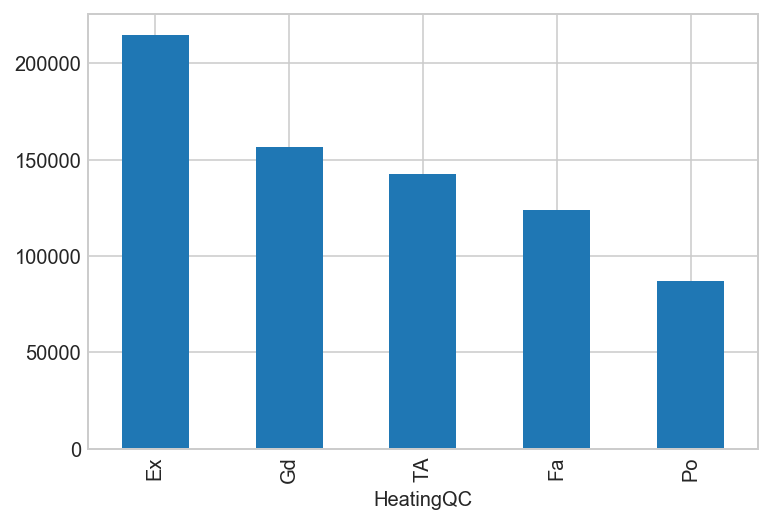

In [77]:
# run plot for HeatingQC and Saleprice
boston_ht=boston1.groupby('HeatingQC').SalePrice.mean().sort_values(ascending=False)
boston_ht.plot(kind='bar')

Make HeatingQC as multiple dummy code

In [78]:
boston1['HeatingQC']=boston1['HeatingQC'].astype('category')
boston1.dtypes

OverallCond       int64
HeatingQC      category
SalePrice         int64
HeatingQC_c        int8
dtype: object

In [79]:
boston1['HeatingQC_c']=boston1['HeatingQC'].cat.codes

boston1.head()

,OverallCond,HeatingQC,SalePrice,HeatingQC_c
0,5,Ex,208500,0
1,8,Ex,181500,0
2,5,Ex,223500,0
3,5,Gd,140000,2
4,5,Ex,250000,0


### Step 2: Model Training & Evaluation

In [69]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_cols=['OverallCond', 'HeatingQC_c']
x=boston1[feature_cols]
x=scaler.fit_transform(x)
y=boston1.SalePrice

### Train and Test on the Entire Data Set

In [70]:
# Run the linear regression with dummy variables included
lr.fit(x, y)
list(zip(feature_cols, lr.coef_))

[('OverallCond', -4532.4344968321657), ('HeatingQC_c', -31543.0533433909)]

### Train_Test_Split 50/50

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1460, 2)
(1095, 2)
(365, 2)


In [72]:
y, x = patsy.dmatrices("SalePrice ~ OverallCond+HeatingQC_c", data=boston1, return_type="dataframe")
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)

In [73]:
lr.fit(x_train, y_train)
from sklearn import metrics
y_pred = lr.predict(x_test)

print(metrics.mean_squared_error(y_train, lr.predict(x_train)))
print(metrics.mean_squared_error(y_test, y_pred))

5580011771.61
4381167115.92


### Using K-Folds Cross-Validation and compare it with Train_Test_Split

In [74]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(x, y):
    lr = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(x.iloc[test_index])))
    scores.append(lr.score(x, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 5812595770.01
R2: 0.162366098378

Model 2
MSE: 4965784431.58
R2: 0.162837920985

Model 3
MSE: 5125373126.23
R2: 0.162591873448

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 5301251109.28
Mean of R2 for all folds: 0.162598630937


Compared to the fix features, MSE was way much bigger when using the changeable property characteristics.


## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [72]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [79]:
abnormal=house[['YearBuilt', 'SaleCondition', 'ExterCond']]
abnormal.head()

,YearBuilt,SaleCondition,ExterCond
0,2003,Normal,TA
1,1976,Normal,TA
2,2001,Normal,TA
3,1915,Abnorml,TA
4,2000,Normal,TA


In [93]:
abnormal.dropna()

,YearBuilt,SaleCondition,ExterCond
0,2003,Normal,TA
1,1976,Normal,TA
2,2001,Normal,TA
3,1915,Abnorml,TA
4,2000,Normal,TA
5,1993,Normal,TA
6,2004,Normal,TA
7,1973,Normal,TA
8,1931,Abnorml,TA
9,1939,Normal,TA


In [101]:
# code salecondtion to categorical data
abnormal['SaleCondition_c']=abnormal['SaleCondition'].astype('category')
abnormal.head()

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,YearBuilt,SaleCondition,ExterCond,SaleCondition_c
0,2003,Normal,TA,Normal
1,1976,Normal,TA,Normal
2,2001,Normal,TA,Normal
3,1915,Abnorml,TA,Abnorml
4,2000,Normal,TA,Normal


In [102]:
abnormal['SaleCondition_c']=abnormal['SaleCondition'].cat.codes

abnormal.head()

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YearBuilt,SaleCondition,ExterCond,SaleCondition_c
0,2003,Normal,TA,4
1,1976,Normal,TA,4
2,2001,Normal,TA,4
3,1915,Abnorml,TA,0
4,2000,Normal,TA,4


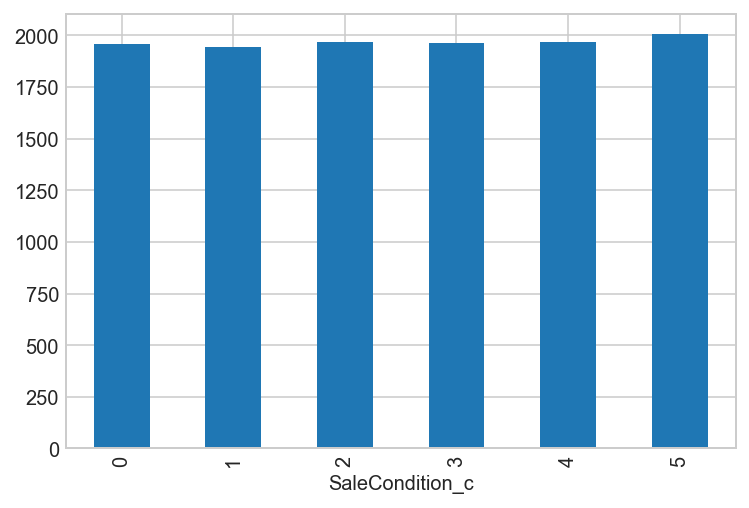

In [106]:
abnormal.groupby('SaleCondition_c').YearBuilt.mean().plot(kind='bar')

In [114]:
# code ExterCond to categorical data
abnormal['ExterCond']=abnormal['ExterCond'].astype('category')
abnormal.head()

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,YearBuilt,SaleCondition,ExterCond,SaleCondition_c,ExterCond_c
0,2003,Normal,TA,4,TA
1,1976,Normal,TA,4,TA
2,2001,Normal,TA,4,TA
3,1915,Abnorml,TA,0,TA
4,2000,Normal,TA,4,TA


In [112]:
abnormal.dtypes

YearBuilt             int64
SaleCondition      category
ExterCond            object
SaleCondition_c        int8
ExterCond_c        category
dtype: object

In [115]:
abnormal['ExterCond_c']=abnormal['ExterCond'].cat.codes

abnormal.head()

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YearBuilt,SaleCondition,ExterCond,SaleCondition_c,ExterCond_c
0,2003,Normal,TA,4,4
1,1976,Normal,TA,4,4
2,2001,Normal,TA,4,4
3,1915,Abnorml,TA,0,4
4,2000,Normal,TA,4,4


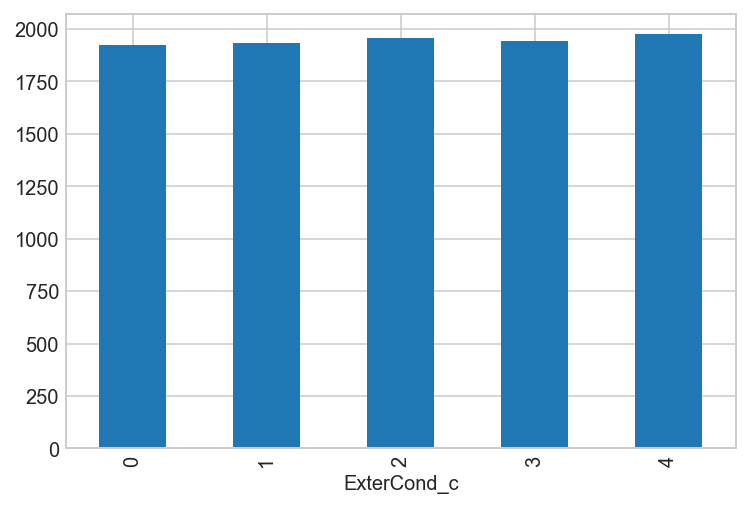

In [116]:
abnormal.groupby('ExterCond_c').YearBuilt.mean().plot(kind='bar')

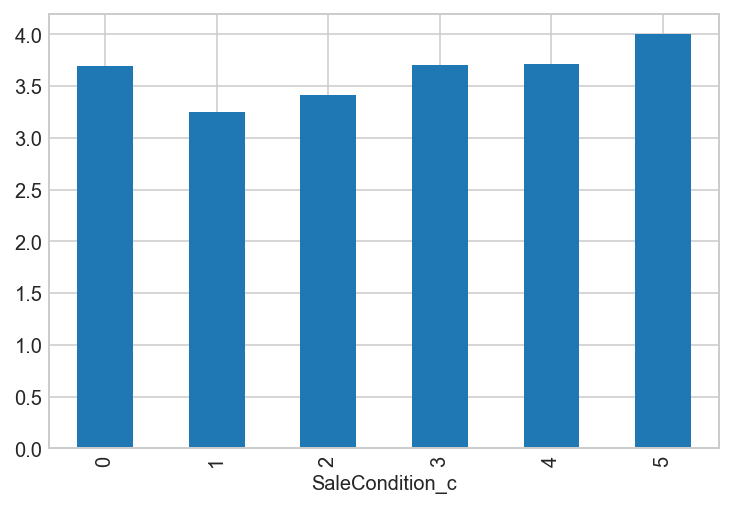

In [119]:
abnormal.groupby('SaleCondition_c').ExterCond_c.mean().plot(kind='bar')

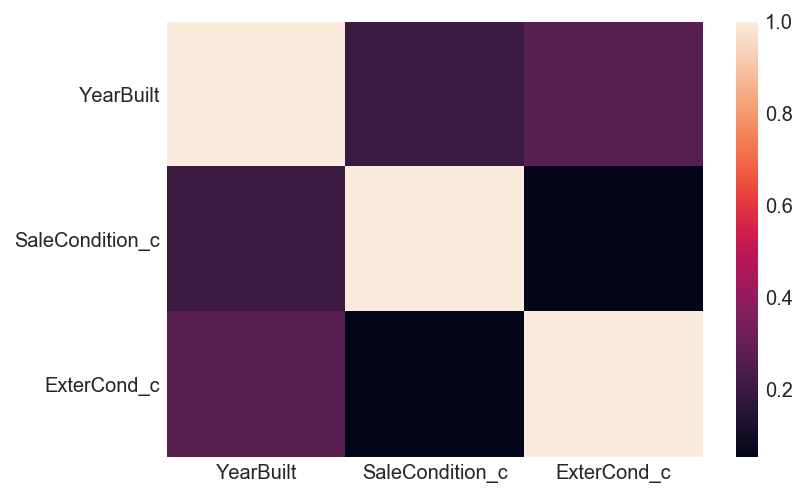

In [117]:
sns.heatmap(abnormal.corr())